In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install ace_tools
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
file_path = 'Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path, sheet_name='Transactions')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [8]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [9]:
df.columns.unique()

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

## Descriptive analytics

In [10]:
# Calculate total revenue per transaction
df['transaction_revenue'] = df['transaction_qty'] * df['unit_price']

# Aggregate revenue by store
store_revenue = df.groupby(['store_id', 'store_location']).agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()

# Rename columns for clarity
store_revenue.rename(columns={
    'transaction_revenue': 'total_revenue',
    'transaction_id': 'total_transactions',
    'transaction_qty': 'total_quantity'
}, inplace=True)

# Calculate average revenue per transaction
store_revenue['avg_revenue_per_transaction'] = store_revenue['total_revenue'] / store_revenue['total_transactions']

# Sort stores by total revenue
top_stores = store_revenue.sort_values(by='total_revenue', ascending=False)

# Identify top-performing stores
print("Top Performing Stores by Revenue:")
print(top_stores)

Top Performing Stores by Revenue:
   store_id   store_location  total_revenue  total_transactions  \
2         8   Hell's Kitchen      236511.17               50735   
0         3          Astoria      232243.91               50599   
1         5  Lower Manhattan      230057.25               47782   

   total_quantity  avg_revenue_per_transaction  
2           71737                     4.661696  
0           70991                     4.589891  
1           71742                     4.814726  


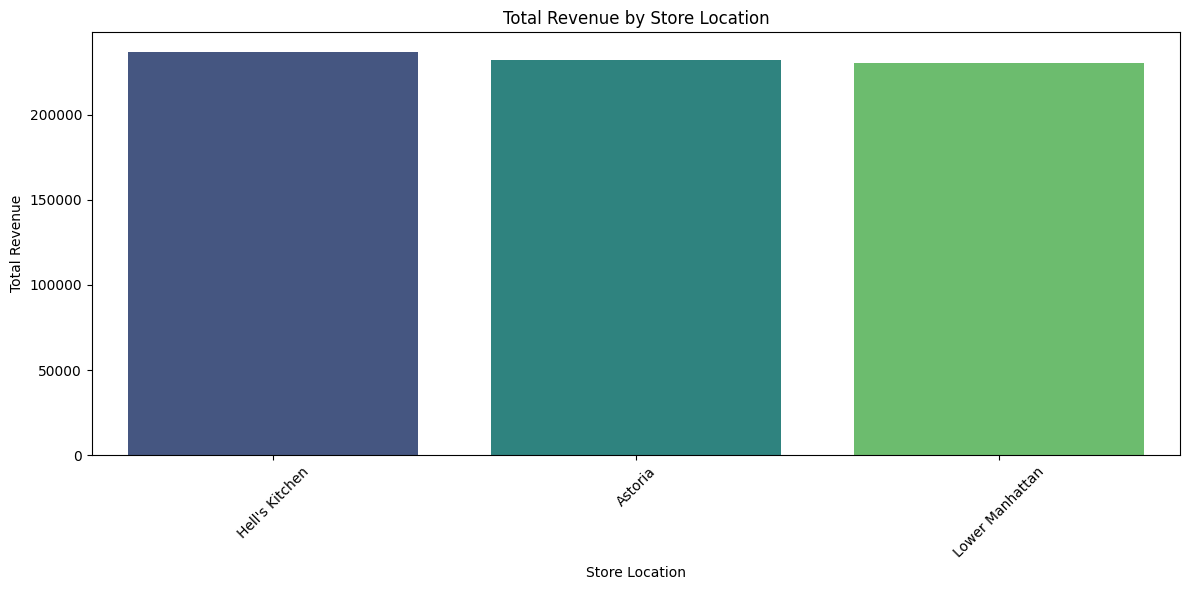

In [11]:
# Plotting highest revenue earning store
plt.figure(figsize=(12, 6))
sns.barplot(x='store_location', y='total_revenue', data=top_stores, palette='viridis')
plt.title('Total Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# --- Product Sales & Pricing Optimization ---
# Aggregate revenue and quantity by product category and type
product_performance = df.groupby(['product_category', 'product_type']).agg({
    'transaction_revenue': 'sum',
    'transaction_qty': 'sum',
    'transaction_id': 'nunique'
}).reset_index()

# Calculate average revenue per transaction for products
product_performance['avg_revenue_per_transaction'] = product_performance['transaction_revenue'] / product_performance['transaction_id']

# Display top-performing products by revenue
print("Top Product Performance:")
print(product_performance.sort_values(by='transaction_revenue', ascending=False))

Top Product Performance:
      product_category           product_type  transaction_revenue  \
5               Coffee       Barista Espresso             91406.20   
26                 Tea        Brewed Chai tea             77081.95   
16  Drinking Chocolate          Hot chocolate             72416.00   
7               Coffee  Gourmet brewed coffee             70034.60   
25                 Tea       Brewed Black tea             47932.00   
28                 Tea      Brewed herbal tea             47539.50   
9               Coffee  Premium brewed coffee             38781.15   
8               Coffee  Organic brewed coffee             37746.50   
2               Bakery                  Scone             36866.12   
6               Coffee            Drip coffee             31984.00   
1               Bakery                 Pastry             25655.99   
27                 Tea       Brewed Green tea             23852.50   
0               Bakery               Biscotti             19793.5

In [ ]:
# --- Time-based Sales Trends ---
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract month and day for analysis
df['month'] = df['transaction_date'].dt.to_period('M')
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Monthly sales trends
monthly_sales = df.groupby('month').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
print("Monthly Sales Trends:")
print(monthly_sales)

# Day of week sales trends
day_sales = df.groupby('day_of_week').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
print("Day of Week Sales Trends:")
print(day_sales)

Monthly Sales Trends:
     month  transaction_revenue  transaction_id  transaction_qty
0  2023-01             81677.74           17314            24870
1  2023-02             76145.19           16359            23550
2  2023-03             98834.68           21229            30406
3  2023-04            118941.08           25335            36469
4  2023-05            156727.76           33527            48233
5  2023-06            166485.88           35352            50942
Day of Week Sales Trends:
  day_of_week  transaction_revenue  transaction_id  transaction_qty
0      Friday            101373.00           21701            31207
1      Monday            101677.28           21643            31231
2    Saturday             96894.48           20510            29614
3      Sunday             98330.31           21096            30182
4    Thursday            100767.78           21654            31162
5     Tuesday             99455.94           21202            30449
6   Wednesday        

In [ ]:
# --- Average Sales per Transaction ---
avg_sales_per_transaction = df.groupby('product_type').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
avg_sales_per_transaction['avg_revenue'] = avg_sales_per_transaction['transaction_revenue'] / avg_sales_per_transaction['transaction_id']
avg_sales_per_transaction['avg_quantity'] = avg_sales_per_transaction['transaction_qty'] / avg_sales_per_transaction['transaction_id']
print("Average Sales per Transaction:")
print(avg_sales_per_transaction)

Average Sales per Transaction:
             product_type  transaction_revenue  transaction_id  \
0        Barista Espresso             91406.20           16403   
1                Biscotti             19793.53            5711   
2               Black tea              2711.85             303   
3        Brewed Black tea             47932.00           11350   
4         Brewed Chai tea             77081.95           17183   
5        Brewed Green tea             23852.50            5671   
6       Brewed herbal tea             47539.50           11245   
7                Chai tea              4301.25             443   
8                Clothing              6163.00             221   
9      Drinking Chocolate              2728.04             266   
10            Drip coffee             31984.00            8477   
11         Espresso Beans              5560.25             319   
12          Gourmet Beans              6798.00             366   
13  Gourmet brewed coffee             70034.6